# Лабораторна робота №5 Association Rules
## Пустовойт Павло КА-98
### Варіант 21 (Var_5_BlackFriday)

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import os

warnings.filterwarnings('ignore')

Загружаємо наші данні - BlackFriday.

In [2]:
df = pd.read_csv('/home/pavel/Documents/IAD/Lab_5_Apriori/Var_5_BlackFriday.csv')

In [3]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


(   User_ID Product_ID Gender   Age  Occupation City_Category  \
 0  1000001  P00069042      F  0-17          10             A   
 1  1000001  P00248942      F  0-17          10             A   
 2  1000001  P00087842      F  0-17          10             A   
 3  1000001  P00085442      F  0-17          10             A   
 4  1000002  P00285442      M   55+          16             C   
 
   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
 0                          2               0                   3   
 1                          2               0                   1   
 2                          2               0                  12   
 3                          2               0                  12   
 4                         4+               0                   8   
 
    Product_Category_2  Product_Category_3  Purchase  
 0                 NaN                 NaN      8370  
 1                 6.0                14.0     15200  
 2                 NaN     

Кількість унікальних продуктів.

In [4]:
len(df['Product_ID'].unique())

3623

Найбільш популярні продукти.

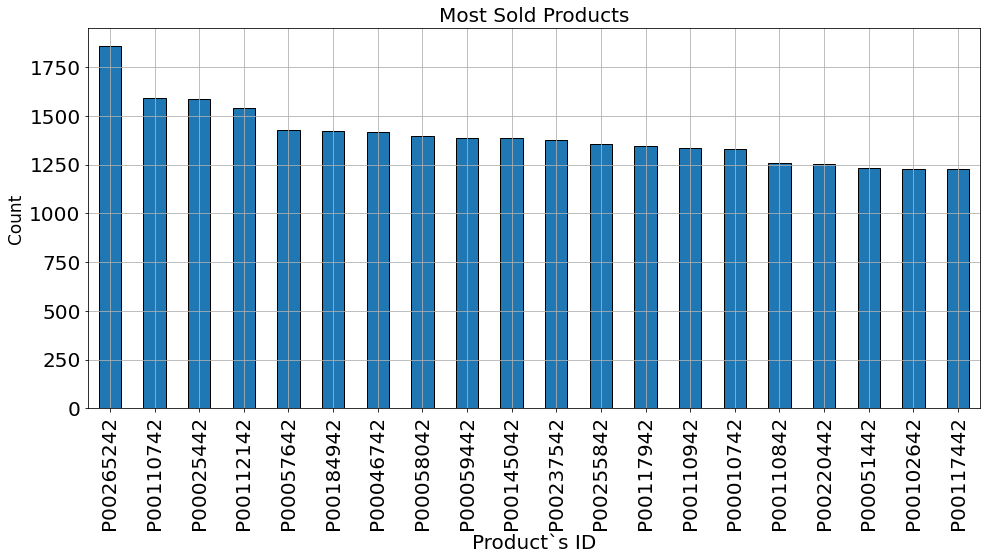

In [5]:
fig, ax=plt.subplots(figsize=(16,7))
df['Product_ID'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Product`s ID',fontsize=20)
plt.ylabel('Count',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('Most Sold Products',fontsize=20)
plt.grid()
plt.ioff()

Оскільки наші данні надзвичайно великі (при роботі алгоритму Apriori можуть займати понад 10 гигабайтів) ми будмо використовувати найбільшу підвибірку. Найзручнішими є підвибірки по містам - їх три. Можна брати й по статі, віку та інше, проте це не є раціонально, оскільки ми досліджуємо продажі магазинів, то логічно взяти магазин в певному місті і правила для нього.

In [6]:
df.City_Category.value_counts().head()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [7]:
df = df[df.City_Category == 'B']

In [8]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)

df['Quantity']=df['Product_Category_1']+df['Product_Category_2']+df['Product_Category_3']

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Quantity
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,26.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,16.0,15854,32.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,16.0,15686,33.0
18,1000007,P00036842,M,36-45,1,B,1,1,1,14.0,16.0,11788,31.0
29,1000010,P00085942,F,36-45,1,B,4+,1,2,4.0,8.0,16352,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537542,1004732,P00085242,M,26-35,14,B,2,1,8,14.0,17.0,10036,39.0
537543,1004732,P00117242,M,26-35,14,B,2,1,8,17.0,16.0,7802,41.0
537544,1004732,P00093342,M,26-35,14,B,2,1,1,8.0,18.0,11535,27.0
537548,1004734,P00111042,M,51-55,1,B,1,1,15,8.0,16.0,20924,39.0


In [9]:
black_friday = pd.pivot_table(data = df, index = 'User_ID', columns = 'Product_ID', values = 'Quantity', \
                        aggfunc = 'sum', fill_value = 0)

black_friday.head()

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000010,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000018,12,0,0,0,0,0,0,0,0,19,...,0,0,0,0,0,0,0,0,0,0
1000021,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def to_binary(x):
    return 1 if x > 0 else 0

black_friday_basket = black_friday.applymap(to_binary)

In [11]:
black_friday_basket

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000010,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000018,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000021,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006025,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006036,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
def associate_rules_viz(rules):
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
    ax1.scatter(rules['support'], rules['lift'], alpha=0.5)
    ax1.set_xlabel('support', fontsize = 16)
    ax1.set_ylabel('lift', fontsize = 16)
    ax1.set_title('Support vs lift', fontsize = 16)

    ax2.scatter(rules['support'], rules['confidence'], alpha=0.5)
    ax2.set_xlabel('support', fontsize = 16)
    ax2.set_ylabel('confidence', fontsize = 16)
    ax2.set_title('Support vs Confidence', fontsize = 16)

    ax3.scatter(rules['confidence'], rules['lift'], alpha=0.5)
    ax3.set_xlabel('confidence', fontsize = 16)
    ax3.set_ylabel('lift', fontsize = 16)
    ax3.set_title('Confidence vs lift', fontsize = 16)

Association Rule Learning намагається передбачити транзакції клієнтів. Алгоритм вирішує проблему «Люди, які купили ----- також купили ----- ». Це може виявитися надзвичайно корисним для роздрібних продавців, які прагнуть оптимізувати розміщення продуктів у магазинах та рекламні кампанії. <br> 
Алгоритм Apriori спеціально спрямований на максимізацію ймовірності того, що хтось виконає/купить/перегляне якийся продукт, орієнтуючись на свої попередні дії.<br> 
Алгоритм Apriori працює з двійковим форматом даних. <br>

Метрики: <br>
&emsp; Support &emsp; $\frac{\text{number of transactions with items(s)}}{\text{number of transactions}}$<br>
&emsp;&emsp; Показник того, як часто набір елементів з’являється в наборі даних.<br><br>

&emsp; Confidence &emsp; $\frac{\text{Support}X\&Y}{\text{Support}X}$ <br>
&emsp;&emsp; Є показником того, як часто правило виявляється вірним.<br>
&emsp;&emsp; Confidence дає нам ймовірність, що ми придбаємо Y, якщо ми купили X.<br><br>


&emsp; Lift &emsp; $\frac{\text{Support}(X\&Y)}{\text{Support}(X)\text{Support}(Y)}$<br>
&emsp;&emsp; >1 говорить нам, що 2 елементи зустрічаються в транзакціях частіше, ніж ми очікували, виходячи з їхніх індивідуальних значень Support. Це означає, що зв’язок навряд чи можна пояснити випадковістю. Цей поріг зручний для фільтрації.<br>
&emsp;&emsp; <1 говорить нам, що 2 елементи об’єднуються в трансакції рідше, ніж ми очікували, наче об’єднання відбувалося випадково.<br><br>


In [13]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [14]:
apriori_itemsets = apriori(black_friday_basket, min_support=0.1, use_colnames=True)
apriori_itemsets

,support,itemsets
0,0.251318,(P00000142)
1,0.103691,(P00000242)
2,0.123023,(P00000642)
3,0.135911,(P00001042)
4,0.135325,(P00001142)
...,...,...
642,0.119508,"(P00265242, P00251242)"
643,0.117165,"(P00265242, P00255842)"
644,0.106620,"(P00265242, P00270942)"
645,0.124780,"(P00265242, P00278642)"


In [15]:
rules_apr = association_rules(apriori_itemsets, metric='lift', min_threshold=1)
rules_apr.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(P00110742),(P00000142),0.340363,0.251318,0.103691,0.304647,1.212197,0.018151,1.076694
1,(P00000142),(P00110742),0.251318,0.340363,0.103691,0.412587,1.212197,0.018151,1.122953
2,(P00117442),(P00000142),0.264792,0.251318,0.100762,0.380531,1.514141,0.034215,1.208586
3,(P00000142),(P00117442),0.251318,0.264792,0.100762,0.400932,1.514141,0.034215,1.227254
4,(P00145042),(P00000142),0.306385,0.251318,0.102519,0.334608,1.331412,0.025519,1.125174


In [16]:
rules_apr.sort_values(by='support',ascending=False)
rules_apr[ (rules_apr['lift'] >= 1) & (rules_apr['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
86,(P00128942),(P00025442),0.219684,0.322203,0.111306,0.506667,1.572509,0.040524,1.373913
104,(P0097242),(P00025442),0.205038,0.322203,0.102519,0.500000,1.551818,0.036455,1.355595
195,(P00062842),(P00046742),0.196251,0.311072,0.101933,0.519403,1.669719,0.040885,1.433484
197,(P00073842),(P00046742),0.213825,0.311072,0.110135,0.515068,1.655785,0.043620,1.420671
235,(P00270942),(P00046742),0.263620,0.311072,0.132396,0.502222,1.614488,0.050391,1.384007
283,(P00270942),(P00057642),0.263620,0.292912,0.132396,0.502222,1.714587,0.055179,1.420490
285,(P00057942),(P00110742),0.199766,0.340363,0.109549,0.548387,1.611182,0.041556,1.460624
341,(P00073842),(P00110742),0.213825,0.340363,0.107791,0.504110,1.481093,0.035013,1.330207
381,(P00112542),(P00110742),0.237844,0.340363,0.122437,0.514778,1.512438,0.041484,1.359455
415,(P0097242),(P00110742),0.205038,0.340363,0.108377,0.528571,1.552963,0.038590,1.399230


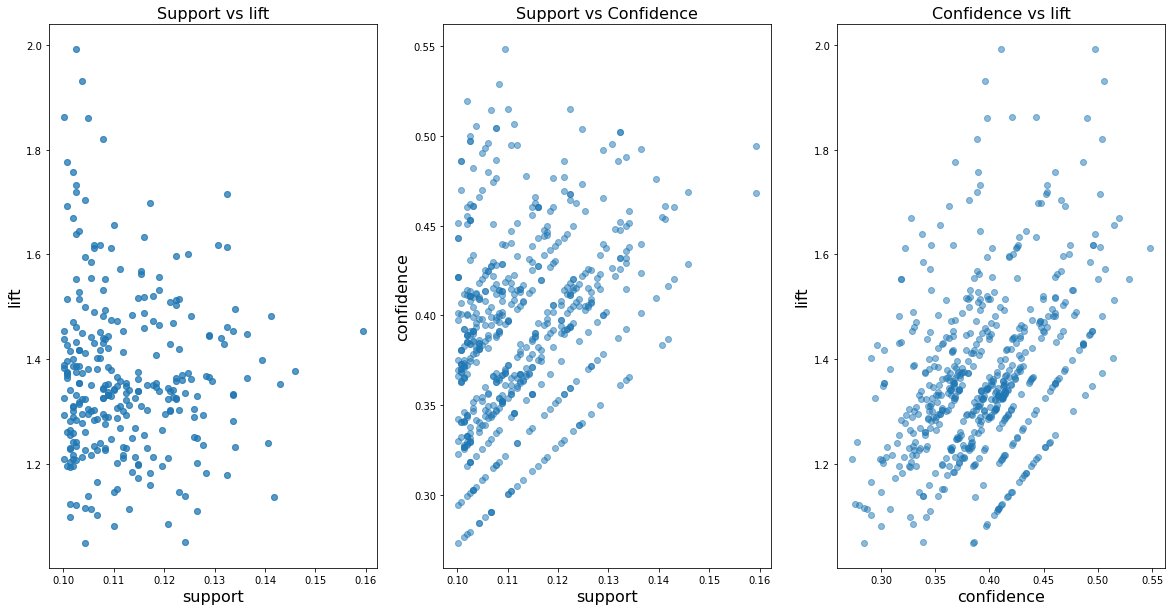

In [17]:
associate_rules_viz(rules_apr)

In [18]:
apriori_itemsets = apriori(black_friday_basket, min_support=0.2, use_colnames=True)
apriori_itemsets

,support,itemsets
0,0.251318,(P00000142)
1,0.213240,(P00003442)
2,0.223784,(P00005042)
3,0.297598,(P00010742)
4,0.322203,(P00025442)
5,0.273579,(P00028842)
6,0.251904,(P00031042)
7,0.254833,(P00034742)
8,0.206210,(P00036842)
9,0.249561,(P00044442)


In [19]:
rules_apr = association_rules(apriori_itemsets, metric='lift', min_threshold=1)
rules_apr.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


FP-Growth — це алгоритм для вилучення частих наборів елементів із застосуванням у навчанні правил асоціації, який став популярною альтернативою усталеному алгоритму Apriori.<br>

Загалом, алгоритм був розроблений для роботи з базами даних, що містять транзакції, наприклад покупки клієнтами магазину. Набір елементів вважається "частим", якщо він відповідає визначеному користувачем порогу підтримки. Наприклад, якщо поріг підтримки встановлено на 0,5 (50%), набір частих елементів визначається як набір елементів, які зустрічаються разом принаймні 50% усіх транзакцій у базі даних.<br>

In [20]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth_itemsets = fpgrowth(black_friday_basket, min_support=0.1, use_colnames=True)
fpgrowth_itemsets

,support,itemsets
0,0.322203,(P00025442)
1,0.311072,(P00046742)
2,0.310486,(P00112142)
3,0.303456,(P00184942)
4,0.261863,(P00114942)
...,...,...
642,0.122437,"(P00046742, P00010742)"
643,0.120680,"(P00145042, P00010742)"
644,0.114821,"(P00025442, P00010742)"
645,0.100762,"(P00028842, P00112442)"


In [21]:
rules_fp = association_rules(fpgrowth_itemsets, metric='lift', min_threshold=1)
rules_fp.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(P00110742),(P00025442),0.340363,0.322203,0.159344,0.468158,1.452993,0.049678,1.274434
1,(P00025442),(P00110742),0.322203,0.340363,0.159344,0.494545,1.452993,0.049678,1.305037
2,(P00265242),(P00025442),0.366725,0.322203,0.124194,0.338658,1.051072,0.006035,1.024882
3,(P00025442),(P00265242),0.322203,0.366725,0.124194,0.385455,1.051072,0.006035,1.030477
4,(P00046742),(P00025442),0.311072,0.322203,0.133568,0.429379,1.332635,0.033339,1.187823


In [22]:
rules_fp.sort_values(by='support',ascending=False)
rules_fp[ (rules_fp['lift'] >= 1) & (rules_apr['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


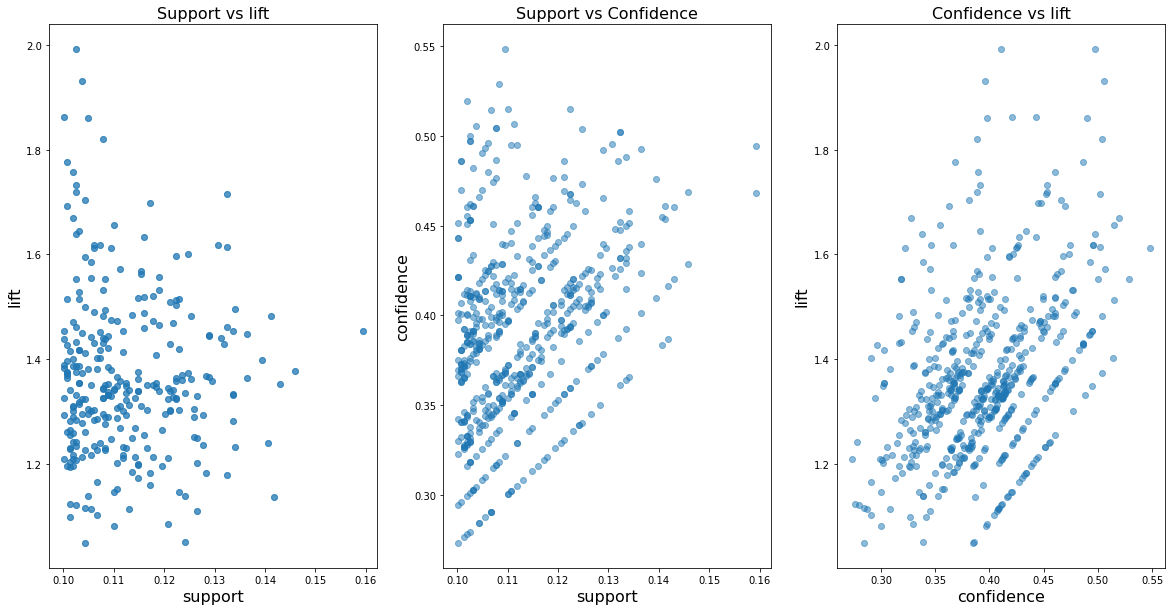

In [23]:
associate_rules_viz(rules_fp)

In [24]:
fpgrowth_itemsets = fpgrowth(black_friday_basket, min_support=0.05, use_colnames=True)
rules_fp = association_rules(fpgrowth_itemsets, metric='lift', min_threshold=1)
rules_fp.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(P00110742),(P00025442),0.340363,0.322203,0.159344,0.468158,1.452993,0.049678,1.274434
1,(P00025442),(P00110742),0.322203,0.340363,0.159344,0.494545,1.452993,0.049678,1.305037
2,(P00265242),(P00025442),0.366725,0.322203,0.124194,0.338658,1.051072,0.006035,1.024882
3,(P00025442),(P00265242),0.322203,0.366725,0.124194,0.385455,1.051072,0.006035,1.030477
4,"(P00110742, P00265242)",(P00025442),0.141769,0.322203,0.062097,0.438017,1.359444,0.016419,1.206080


In [25]:
rules_fp.sort_values(by='support',ascending=False)
rules_fp[ (rules_fp['lift'] >= 1) & (rules_apr['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
